<a href="https://colab.research.google.com/github/jafetsierra/Data-science/blob/main/SuicideRate_2000_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Suicide Rates Overview 1985 to 2016
Compares socio-economic info with suicide rates by year and country

[texto del enlace](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)

In [6]:
df_suicides = pd.read_csv('us_data.csv')

In [7]:
df_suicides.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
#df_suicides['country'].unique()

In [9]:
df_suicides = df_suicides[df_suicides['country']=='United States']

In [10]:
df_suicides['year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [11]:
df_s_g = df_suicides.groupby('year')
data = []
years = np.linspace(2000,2015,16,dtype=int)
for k,g in df_s_g:
  if k in years:
    data.append([int(k),g['suicides/100k pop'].mean()])
df_s = pd.DataFrame(data,columns=['year','suicides/100k pop'])
df_s

,year,suicides/100k pop
0,2000,12.215000
1,2001,12.351667
2,2002,12.501667
3,2003,12.136667
4,2004,12.241667
5,2005,12.223333
6,2006,12.094167
7,2007,12.426667
8,2008,12.770000
9,2009,12.849167


# World Suicide Rate 2000-2015

[texto del enlace](https://databank.worldbank.org/reports.aspx?source=2&country=JPN#)

In [12]:
df_world = pd.read_csv('Data_worldwide.csv')
df_worldT = df_world.T

In [13]:
df_world = pd.read_csv('Data_worldwide.csv')
df_worldT = df_world.T
df_worldT = df_worldT.reset_index()
df_worldT = df_worldT.drop([1,2,3])
df_worldT = df_worldT.drop([6,7,8,9,10],axis=1)
new_header = ['year','Japan','Colombia','Canada','France','Germany','Australia']
df_worldT = df_worldT[1:]
df_worldT.columns = new_header
df_worldT = df_worldT.reset_index()
df_worldT = df_worldT.drop('index',axis=1)
df_worldT = df_worldT.replace('(?<=\d{4}).*','',regex=True)
df_worldT['year'] = df_worldT['year'].astype(int)
df_worldT

,year,Japan,Colombia,Canada,France,Germany,Australia
0,2000,23.9,5.0,11.9,20.2,14.5,12.7
1,2001,23.2,4.9,12.2,19.5,14.5,12.2
2,2002,23.8,4.7,11.9,19.8,14.6,11.3
3,2003,25.6,4.6,12.4,20.1,14.4,10.5
4,2004,24.1,4.5,11.7,19.5,14.0,10.3
5,2005,24.3,4.1,12.2,19.1,13.3,11.2
6,2006,23.9,4.1,11.2,18.5,12.8,10.6
7,2007,25.0,4.1,11.5,17.9,12.4,10.9
8,2008,24.4,4.2,11.5,18.2,12.5,11.6
9,2009,24.9,4.1,12.0,18.4,12.8,11.2


In [14]:
rta = df_worldT.merge(df_s,on='year',how='left')
rta = rta.rename(columns = {'suicides/100k pop':'US'})
rta = rta.set_index('year')
rta

,Japan,Colombia,Canada,France,Germany,Australia,US
year,,,,,,,
2000,23.9,5.0,11.9,20.2,14.5,12.7,12.215000
2001,23.2,4.9,12.2,19.5,14.5,12.2,12.351667
2002,23.8,4.7,11.9,19.8,14.6,11.3,12.501667
2003,25.6,4.6,12.4,20.1,14.4,10.5,12.136667
2004,24.1,4.5,11.7,19.5,14.0,10.3,12.241667
2005,24.3,4.1,12.2,19.1,13.3,11.2,12.223333
2006,23.9,4.1,11.2,18.5,12.8,10.6,12.094167
2007,25.0,4.1,11.5,17.9,12.4,10.9,12.426667
2008,24.4,4.2,11.5,18.2,12.5,11.6,12.770000


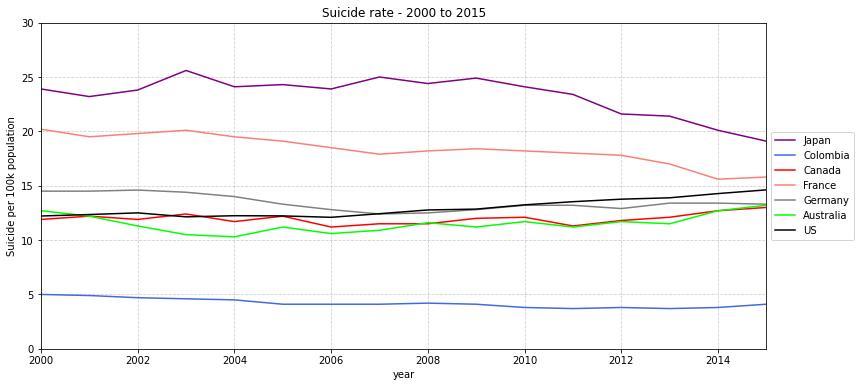

In [29]:
colors = ['purple','royalblue','red','salmon','gray','lime','black']
rta.plot(figsize=(13,6),color=colors).legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Suicide rate - 2000 to 2015')
plt.ylabel('Suicide per 100k population')
plt.grid(True,linestyle='--',alpha=0.6,)
plt.xlim(2000,2015)
plt.ylim(0,30)
plt.savefig('assignment_4')
plt.show()